In [12]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
import csv

In [87]:
driver = webdriver.Firefox()

# Load the web page
driver.get("https://nepalbhoomi.com/categories/house/sale")


In [ ]:
house_links=[]#list to store house links

In [37]:
counter=0#count number of links
while (1):#terminates when next buttton is unclickable
    elements = driver.find_elements("css selector", ".item.important")#find elements in web page of "<div class="item_important">"
    for element in elements:
        href = element.find_element("css selector", "a").get_attribute('href')#find anchor tags in selected class and extract href attribute
        print( href)
        house_links.append(href)#appends to the list
        counter=counter+1
    next_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//a[contains(text(), 'Next')]")))
    next_button.click()

https://nepalbhoomi.com/properties/house-on-sale-at-bhaisepati-near-big-mart
https://nepalbhoomi.com/properties/residential-semi-furnished-6-bhk-bungalow-house-is-at-balkumari-imadole
https://nepalbhoomi.com/properties/residential-3-5-storey-house-is-for-sale-at-opposite-of-army-rehabilitation-center-nearby-dhungedhara-banasthali
https://nepalbhoomi.com/properties/luxury-villa-for-sale-at-thecho-just-nearby-cg-the-villa-housing-thecho
https://nepalbhoomi.com/properties/bungalo-on-sale-at-sunakothi-lalitpur
https://nepalbhoomi.com/properties/beautifull-2-5-storied-residential-house-for-sale-at-bhaisepati
https://nepalbhoomi.com/properties/residential-3-5-storey-house-built-on-6-aana-3-paisa-on-sale-at-lamathumki-sitapaila
https://nepalbhoomi.com/properties/semi-furnished-residential-bungalow-house-at-kirtipur-tyanglaphat
https://nepalbhoomi.com/properties/residential-bungalow-house-at-maharajgunj-ganesh-basti-opposite-of-qatar-visa-center
https://nepalbhoomi.com/properties/residential-2

TimeoutException: Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:183:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:395:5
element.find/</<@chrome://remote/content/marionette/element.sys.mjs:134:16


In [38]:
len(house_links)


60

In [138]:
house_dictionary={}
title_val = []
address_val =[]
price = []
bedroom = []
bathroom = []
floor = []
parking = []
property_face=[]
build_year = []
road_access = []
land_area=[]




In [139]:
for link in house_links:
    ff=None
    bedf=None
    pf=None
    barf=None
    
    driver.get(link)
    #title
    title_val.append(driver.find_element('tag name','h4').text)
    #address of the house
    try:
        address_val.append(driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/div[1]/div[1]/div/ul/li[1]/p').text)
    except NoSuchElementException:
        address_val.append(None)
    #price
    try:
        price.append(driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/div[1]/div[2]/div[1]/h4').text)
    except NoSuchElementException:
        price.append(None)
    #area of the land
    try:
        land_area.append(driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[2]/div[1]/div[1]/div[2]/div/div/div[1]/article[2]/div/div[1]/div/div[2]/ul/li[1]/span').text)
    except NoSuchElementException:
        land_area.append(None)
    
    #road width(13,feet,20 feet)
    try:
        road_access.append(driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/div[2]/div[1]/div[1]/div[2]/div/div/div[1]/article[2]/div/div[1]/div/div[2]/ul/li[2]/span').text)
    except NoSuchElementException:
        road_access.append(None)
    #facing
    try:
        property_face.append(driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/div[2]/div[1]/div[1]/div[2]/div/div/div[1]/article[2]/div/div[1]/div/div[1]/ul/li[2]/span').text)
    except NoSuchElementException:
        property_face.append(None)
    #in css of website there are missing fields in rooms and floors, to check and filter that elseif ladder is used
    try:
        bedc = driver.find_element(By.XPATH, '/html/body/div/div[3]/div[2]/div[1]/div[1]/div[2]/div/div/div[1]/article[1]/div/div/div/div/div/ul/li[1]/span').text
    except NoSuchElementException:
        bedc=None
    try:
        lvc= driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/div[2]/div[1]/div[1]/div[2]/div/div/div[1]/article[1]/div/div/div/div/div/ul/li[2]/span').text
    except NoSuchElementException:
        lvc=None
    try:
        barc= driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/div[2]/div[1]/div[1]/div[2]/div/div/div[1]/article[1]/div/div/div/div/div/ul/li[3]/span').text
    except NoSuchElementException:
        barc=None
    try:
        fc= driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/div[2]/div[1]/div[1]/div[2]/div/div/div[1]/article[1]/div/div/div/div/div/ul/li[4]/span').text
    except NoSuchElementException:
        fc=None
    try:
        pc= driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/div[2]/div[1]/div[1]/div[2]/div/div/div[1]/article[1]/div/div/div/div/div/ul/li[5]/span').text
    except NoSuchElementException:
        pc=None
    
    if (str(bedc).find("Bedroom")>0):
        bedf=int(bedc.replace(" Bedroom",""))
    elif (str(bedc).find("Bathroom")>0):
        bedf=int(bedc.replace(" Bathroom",""))
    elif (str(bedc).find("Floor")>0):
        bedf=float(bedc.replace(" Floor",""))
    elif (str(bedc).find("Parking")>0):
        bedf=int(bedc.replace(" Parking",""))
    else:
        lf=0
    
    if (str(lvc).find("Bedroom")>0):
        lvf=int(lvc.replace(" Bedroom",""))
    elif (str(lvc).find("Bathroom")>0):
        lvf=int(lvc.replace(" Bathroom",""))
    elif (str(lvc).find("Floor")>0):
        lvf=float(lvc.replace(" Floor",""))
    elif (str(lvc).find("Parking")>0):
        lvf=int(lvc.replace(" Parking",""))
    else:
        lf=0
    if (str(barc).find("Bedroom")>0):
        barf=int(barc.replace(" Bedroom",""))
    elif (str(barc).find("Bathroom")>0):
        barf=int(barc.replace(" Bathroom",""))
    elif (str(barc).find("Floor")>0):
        barf=float(barc.replace(" Floor",""))
    elif (str(barc).find("Parking")>0):
        barf=int(barc.replace(" Parking",""))
    else:
        lf=0
    if (str(fc).find("Bedroom")>0):
        ff=int(fc.replace(" Bedroom",""))
    elif (str(fc).find("Bathroom")>0):
        ff=int(fc.replace(" Bathroom",""))
    elif (str(fc).find("Floor")>0):
        ff=float(fc.replace(" Floor",""))
    elif (str(fc).find("Parking")>0):
        ff=int(fc.replace(" Parking",""))
    else:
        lf=0
    if (str(pc).find("Bedroom")>0):
        pf=int(pc.replace(" Bedroom",""))
    elif (str(pc).find("Bathroom")>0):
        pf=int(pc.replace(" Bathroom",""))
    elif (str(pc).find("Floor")>0):
        pf=float(pc.replace(" Floor",""))
    elif (str(pc).find("Parking")>0):
        pf=int(pc.replace(" Parking",""))
    else:
        lf=0
    parking.append(pf)
    bedroom.append(bedf)
    bathroom.append(barf)
    floor.append(ff)




In [141]:
len(bedroom) 

59

In [3]:
house_dictionary.update({'title':title_val,
                         'address':address_val,
                         'price':price,
                         'land_area':land_area,
                         'road_access':road_access,
                         'Facing':property_face,
                         'parking':parking,
                         'bedroom':bedroom,
                         'bathroom':bathroom,
                         'floor':floor})
                           

NameError: name 'house_dictionary' is not defined

In [2]:
import pandas as pd
df_homedata = pd.DataFrame(house_dictionary)
df_homedata.to_csv('Dataset_nepalbhoomi.csv')

NameError: name 'house_dictionary' is not defined

In [146]:

df_homedata 

,title,address,price,land_area,road_access,Facing,parking,bedroom,bathroom,floor
0,House on sale at Bhaisepati near Big Mart.,"Talim Kendra Road,Bhaisepati,Kathmandu","NPR 85,000,000",7 aana 3 paisa 2 dam,33 ft,South/East,2.0,6.0,5.0,2.5
1,Residential Semi-Furnished 6 BHK Bungalow Hous...,"Balkumari, Imadole,Balkumari,Lalitpur","NPR 60,000,000",9 aana,13 ft,East,3.0,6.0,6.0,3.5
2,Residential 3.5 Storey House is FOR SALE at Op...,"Banasthali,Dhungedhara,Kathmandu","NPR 34,000,000",4 Aana,13,East,1.0,6.0,5.0,3.5
3,Luxury Villa For Sale @ Thecho just nearby CG ...,"Thecho,Sunakothi,Lalitpur","NPR 85,000,000",9 aana 3 paisa,16ft,East,3.0,6.0,7.0,2.5
4,Bungalo on sale at Sunakothi Lalitpur,"Villa sunakothi,sunakothi,Lalitpur","NPR 32,500,000",4 aana 1 paisa,Yes,North,NaN,5.0,3.0,2.0
5,Beautifull 2.5 storied Residential House for S...,"Bhaisipati, Saibudol,Bhaisepati,Lalitpur","NPR 33,500,000",5 Aana 1 Paisa,14,North/East,3.0,5.0,4.0,2.5
6,Residential 3.5 storey house built on 6 aana 3...,"Lamathumki, Sitapaila.,Lamathumki, Sitapaila.,...","NPR 38,000,000",6aana 3paisa,13 feet,East,NaN,9.0,7.0,3.5
7,"Semi-furnished Residential Bungalow House ""𝐅𝐎𝐑...","Kritipur,Tyanglaphat Heigh,Kathmandu","NPR 57,000,000",7 aana 2 paisa,20,east,1.0,5.0,4.0,2.0
8,"Residential Bungalow House ""𝐅𝐎𝐑 𝐒𝐀𝐋𝐄"" at Mahar...","Maharajgunj,chakrapath,Kathmandu","NPR 72,500,000",10,13,North/East,1.0,6.0,4.0,2.5
9,Residential 2.5 Storey Ready to MOVE Full-furn...,"Ichangu Narayan, Namgel chowk,sano bharyang,Ka...","NPR 31,000,000",3 aana 3 paisa 1 dam,10,north,1.0,5.0,4.0,2.5


In [4]:
string="Lolang height,Tarkeswor Municipality-01,Kathmandu"
parts = string.split(",")
count=len(parts)
count

3

In [5]:
parts[2]

'Kathmandu'

In [7]:
import pandas as pd
df = pd.read_csv('Dataset_nepalbhoomi.csv')


In [8]:
df.address

0                Talim Kendra Road,Bhaisepati,Kathmandu
1                 Balkumari, Imadole,Balkumari,Lalitpur
2                      Banasthali,Dhungedhara,Kathmandu
3                             Thecho,Sunakothi,Lalitpur
4                    Villa sunakothi,sunakothi,Lalitpur
5              Bhaisipati, Saibudol,Bhaisepati,Lalitpur
6     Lamathumki, Sitapaila.,Lamathumki, Sitapaila.,...
7                  Kritipur,Tyanglaphat Heigh,Kathmandu
8                      Maharajgunj,chakrapath,Kathmandu
9     Ichangu Narayan, Namgel chowk,sano bharyang,Ka...
10      Madikhatar Tennis Court,Budhanilantha,Kathmandu
11    Shankhamul,Sankhamul, Near by Bagmati Bridge,K...
12              suryadarshan Height,Baniyatar,Kathmandu
13            pasikot,pasikot, budhanilkantha,Kathmandu
14                 umang chowk,budhanilkantha,Kathmandu
15        Sundar Basti Katunje-8,Suryabinayak,Bhaktapur
16         Chapali Bhadrakali.,Budhanilkantha,Kathmandu
17    Putalisadak, New Plaza road (Nearby Singha

In [19]:
#splitting district and city
city=[]
location=[]
for address in (df['address']):

    parts = str(address).split(",")
    
    cit=parts[-1].strip()
    
    city.append(cit)
    address1=address1 = address.replace(cit, '').strip(',')
    location.append(address1)

df['district'] =city
df['address']=location
df.to_csv('bhoomi3.csv',index=False)

    

    
    

In [20]:
df['district']

0     Kathmandu
1      Lalitpur
2     Kathmandu
3      Lalitpur
4      Lalitpur
5      Lalitpur
6     Kathmandu
7     Kathmandu
8     Kathmandu
9     Kathmandu
10    Kathmandu
11    Kathmandu
12    Kathmandu
13    Kathmandu
14    Kathmandu
15    Bhaktapur
16    Kathmandu
17    Kathmandu
18    Kathmandu
19    Kathmandu
20    Kathmandu
21    Kathmandu
22    Kathmandu
23    Kathmandu
24    Kathmandu
25    Kathmandu
26    Kathmandu
27    Kathmandu
28    Kathmandu
29    Kathmandu
30    Kathmandu
31    Kathmandu
32    Kathmandu
33    Kathmandu
34    Kathmandu
35    Kathmandu
36    Kathmandu
37    Kathmandu
38    Kathmandu
39    Kathmandu
40    Kathmandu
41    Kathmandu
42    Kathmandu
43     Lalitpur
44    Kathmandu
45    Kathmandu
46     Lalitpur
47     Lalitpur
48     Lalitpur
49    Kathmandu
50    Kathmandu
51    Kathmandu
52    Kathmandu
53    Kathmandu
54    Kathmandu
55     Lalitpur
56     Lalitpur
57    Kathmandu
58    Kathmandu
Name: district, dtype: object

In [21]:
#cleaning price
df0 = pd.read_csv('bhoomi3.csv')
search_values = [None, 'Price On Call']
filtered_df = df[~df['price'].isin(search_values)]
filtered_df2 =filtered_df .dropna(subset=['price'])
filtered_df2.to_csv('bhoomi2.csv', index=False)

In [77]:
df1 = pd.read_csv('bhoomi4.csv')
newprice=[]
for p in df1.price:
    str (p)
    p1=p.replace(',', '')
    value=int(p1.replace('NPR',''))
    newprice.append(value)
df1['price']=newprice 

df1.to_csv('bhoomi5.csv',index=False)


In [31]:
df1


,Unnamed: 0,title,address,price,land_area,road_access,Facing,parking,bedroom,bathroom,floor,district
0,0,House on sale at Bhaisepati near Big Mart.,"Talim Kendra Road,Bhaisepati",85000000,7 aana 3 paisa 2 dam,33 ft,South/East,2.0,6.0,5.0,2.5,Kathmandu
1,1,Residential Semi-Furnished 6 BHK Bungalow Hous...,"Balkumari, Imadole,Balkumari",60000000,9 aana,13 ft,East,3.0,6.0,6.0,3.5,Lalitpur
2,2,Residential 3.5 Storey House is FOR SALE at Op...,"Banasthali,Dhungedhara",34000000,4 Aana,13,East,1.0,6.0,5.0,3.5,Kathmandu
3,3,Luxury Villa For Sale @ Thecho just nearby CG ...,"Thecho,Sunakothi",85000000,9 aana 3 paisa,16ft,East,3.0,6.0,7.0,2.5,Lalitpur
4,4,Bungalo on sale at Sunakothi Lalitpur,"Villa sunakothi,sunakothi",32500000,4 aana 1 paisa,Yes,North,NaN,5.0,3.0,2.0,Lalitpur
5,5,Beautifull 2.5 storied Residential House for S...,"Bhaisipati, Saibudol,Bhaisepati",33500000,5 Aana 1 Paisa,14,North/East,3.0,5.0,4.0,2.5,Lalitpur
6,6,Residential 3.5 storey house built on 6 aana 3...,"Lamathumki, Sitapaila.,Lamathumki, Sitapaila.",38000000,6aana 3paisa,13 feet,East,NaN,9.0,7.0,3.5,Kathmandu
7,7,"Semi-furnished Residential Bungalow House ""𝐅𝐎𝐑...","Kritipur,Tyanglaphat Heigh",57000000,7 aana 2 paisa,20,east,1.0,5.0,4.0,2.0,Kathmandu
8,8,"Residential Bungalow House ""𝐅𝐎𝐑 𝐒𝐀𝐋𝐄"" at Mahar...","Maharajgunj,chakrapath",72500000,10,13,North/East,1.0,6.0,4.0,2.5,Kathmandu
9,9,Residential 2.5 Storey Ready to MOVE Full-furn...,"Ichangu Narayan, Namgel chowk,sano bharyang",31000000,3 aana 3 paisa 1 dam,10,north,1.0,5.0,4.0,2.5,Kathmandu


In [28]:
#parking update for null value changing none value and 3- to 0,3 or 3+ to 1
#if parking value <3:0
#if parking >=3:1
mew=[]
for par in df1.parking:
    if pd.isna(par):
        park = 0
    elif(int(par)<3):
        park=0
    else:
        park=1
    mew.append(park)
# df1['parking']=mew
# df1['bedroom'].fillna(6, inplace=True)#changing null values of bedroom to 6
# df1['bathroom'].fillna(2, inplace=True)#changing null values of bathroom to 2
# df1['floor'].fillna(2.5, inplace=True)#changing null values of floor to 2.5
    
    

In [32]:
df1

,Unnamed: 0,title,address,price,land_area,road_access,Facing,parking,bedroom,bathroom,floor,district
0,0,House on sale at Bhaisepati near Big Mart.,"Talim Kendra Road,Bhaisepati",85000000,7 aana 3 paisa 2 dam,33 ft,South/East,2.0,6.0,5.0,2.5,Kathmandu
1,1,Residential Semi-Furnished 6 BHK Bungalow Hous...,"Balkumari, Imadole,Balkumari",60000000,9 aana,13 ft,East,3.0,6.0,6.0,3.5,Lalitpur
2,2,Residential 3.5 Storey House is FOR SALE at Op...,"Banasthali,Dhungedhara",34000000,4 Aana,13,East,1.0,6.0,5.0,3.5,Kathmandu
3,3,Luxury Villa For Sale @ Thecho just nearby CG ...,"Thecho,Sunakothi",85000000,9 aana 3 paisa,16ft,East,3.0,6.0,7.0,2.5,Lalitpur
4,4,Bungalo on sale at Sunakothi Lalitpur,"Villa sunakothi,sunakothi",32500000,4 aana 1 paisa,Yes,North,NaN,5.0,3.0,2.0,Lalitpur
5,5,Beautifull 2.5 storied Residential House for S...,"Bhaisipati, Saibudol,Bhaisepati",33500000,5 Aana 1 Paisa,14,North/East,3.0,5.0,4.0,2.5,Lalitpur
6,6,Residential 3.5 storey house built on 6 aana 3...,"Lamathumki, Sitapaila.,Lamathumki, Sitapaila.",38000000,6aana 3paisa,13 feet,East,NaN,9.0,7.0,3.5,Kathmandu
7,7,"Semi-furnished Residential Bungalow House ""𝐅𝐎𝐑...","Kritipur,Tyanglaphat Heigh",57000000,7 aana 2 paisa,20,east,1.0,5.0,4.0,2.0,Kathmandu
8,8,"Residential Bungalow House ""𝐅𝐎𝐑 𝐒𝐀𝐋𝐄"" at Mahar...","Maharajgunj,chakrapath",72500000,10,13,North/East,1.0,6.0,4.0,2.5,Kathmandu
9,9,Residential 2.5 Storey Ready to MOVE Full-furn...,"Ichangu Narayan, Namgel chowk,sano bharyang",31000000,3 aana 3 paisa 1 dam,10,north,1.0,5.0,4.0,2.5,Kathmandu


In [71]:
#changing land_area to square feet
import pandas as pd
import re
ropani=0.0
aana=0.0
paisa=0.0
dam=0.0
sq_feet=0.0

dfp = pd.read_csv("bhoomi2.csv")


#pattern=9 
pattern0=r'^\d+(?:\.\d+)?$'

# Function to update values based on the pattern

def update_value0(value):
    if isinstance(value, str):
        if re.match(pattern0, value, re.IGNORECASE):
            
                aana = float(value)
                
                sq_feet = aana* 342.25
                return sq_feet
        return value  # Return the original value if it doesn't match the pattern
    return value
#Apply the update function to the column
dfp['land_area'] = dfp['land_area'].apply(update_value0)

# Define the pattern you want to match
pattern = r'^\d+-\d+-\d+-\d+$'

# Function to update values based on the pattern

def update_value(value):
    if isinstance(value, str):
        if re.match(pattern, value):
            parts = value.split('-')
            ropani = float(parts[0])
            aana = float(parts[1])
            paisa = float(parts[2])
            dam = float(parts[3])
            sq_feet = ropani*5476 + aana*342.25 + paisa*85.56 + dam*21.39
            return sq_feet
    return value

# Apply the update function to the column
dfp['land_area'] = dfp['land_area'].apply(update_value)

#pattern=9 aana 3 paisa 2 dam
pattern1 = r'^\d+\s+aana\s+\d+\s+paisa\s+\d+\s+dam$'

# Function to update values based on the pattern

def update_value1(value):
    if isinstance(value, str):
        if re.match(pattern1, value, re.IGNORECASE):
            match = re.search(r'(\d+)\s*aana\s+(\d+)\s*paisa\s+(\d+)\s*dam', value, re.IGNORECASE)
            if match:
                aana = float(match.group(1))
                paisa = float(match.group(2))
                dam = float(match.group(3))
                sq_feet = aana * 342.25 + paisa * 85.56 + dam * 21.39
                return sq_feet
        return value  # Return the original value if it doesn't match the pattern
    return value
#Apply the update function to the column
dfp['land_area'] = dfp['land_area'].apply(update_value1)



#pattern=9 aana or 9.5 aana
pattern2 = r'^(\d+(\.\d+)?)\s+aana$'
# Function to update values based on the pattern

def update_value2(value):
    if isinstance(value, str):
        if re.match(pattern2, value, re.IGNORECASE):
            match = re.search(r'(\d+)\s*aana', value, re.IGNORECASE)
            if match:
                aana = float(match.group(1))
               
                sq_feet = aana * 342.25 
                return sq_feet
        return value  # Return the original value if it doesn't match the pattern
    return value
#Apply the update function to the column
dfp['land_area'] = dfp['land_area'].apply(update_value2)



#pattern=9 aana 3 paisa
pattern3 =r'^\d+\s+aana\s+\d+\s+paisa$'
            
# Function to update values based on the pattern

def update_value3(value):
    if isinstance(value, str):
        if re.match(pattern3, value, re.IGNORECASE):
            match = re.search(r'(\d+)\s*aana\s+(\d+)\s*paisa', value, re.IGNORECASE)
            if match:
                aana = float(match.group(1))
                paisa = float(match.group(2))
                sq_feet = aana * 342.25 +paisa*85.56
                return sq_feet
        return value  # Return the original value if it doesn't match the pattern
    return value
#Apply the update function to the column
dfp['land_area'] = dfp['land_area'].apply(update_value3)


#pattern=9 aana 3 dam
pattern4 =r'^\d+\s+aana\s+\d+\s+dam$'
# Function to update values based on the pattern

def update_value4(value):
    if isinstance(value, str):
        if re.match(pattern4, value, re.IGNORECASE):
            match = re.search(r'(\d+)\s*aana\s+(\d+)\s*dam', value, re.IGNORECASE)
            if match:
                aana = float(match.group(1))
                dam = float(match.group(2))
                sq_feet = aana * 342.25 +dam*21.39
                return sq_feet
        return value  # Return the original value if it doesn't match the pattern
    return value
#Apply the update function to the column
dfp['land_area'] = dfp['land_area'].apply(update_value4)


#pattern=9 paisa 3 dam
pattern5=r'^\d+\s+paisa\s+\d+\s+dam$'
# Function to update values based on the pattern

def update_value5(value):
    if isinstance(value, str):
        if re.match(pattern5, value, re.IGNORECASE):
            match = re.search(r'(\d+)\s*paisa\s+(\d+)\s*dam', value, re.IGNORECASE)
            if match:
                paisa = float(match.group(1))
                dam = float(match.group(2))
                sq_feet = paisa * 85.56 +dam*21.39
                return sq_feet
        return value  # Return the original value if it doesn't match the pattern
    return value
#Apply the update function to the column
dfp['land_area'] = dfp['land_area'].apply(update_value5)

dfp.to_csv('bhoomi4.csv',index=False) 


In [113]:
df4=pd.read_csv("bhoomi5.csv")

In [114]:
df4

,Unnamed: 0,title,address,price,land_area,road_access,Facing,parking,bedroom,bathroom,floor,district
0,0,House on sale at Bhaisepati near Big Mart.,"Talim Kendra Road,Bhaisepati",85000000,2695.21,33 ft,South/East,2.0,6.0,5.0,2.5,Kathmandu
1,1,Residential Semi-Furnished 6 BHK Bungalow Hous...,"Balkumari, Imadole,Balkumari",60000000,3080.25,13 ft,East,3.0,6.0,6.0,3.5,Lalitpur
2,2,Residential 3.5 Storey House is FOR SALE at Op...,"Banasthali,Dhungedhara",34000000,1369.00,13,East,1.0,6.0,5.0,3.5,Kathmandu
3,3,Luxury Villa For Sale @ Thecho just nearby CG ...,"Thecho,Sunakothi",85000000,3336.93,16ft,East,3.0,6.0,7.0,2.5,Lalitpur
4,4,Bungalo on sale at Sunakothi Lalitpur,"Villa sunakothi,sunakothi",32500000,1454.56,NaN,North,NaN,5.0,3.0,2.0,Lalitpur
5,5,Beautifull 2.5 storied Residential House for S...,"Bhaisipati, Saibudol,Bhaisepati",33500000,1796.81,14,North/East,3.0,5.0,4.0,2.5,Lalitpur
6,6,Residential 3.5 storey house built on 6 aana 3...,"Lamathumki, Sitapaila.,Lamathumki, Sitapaila.",38000000,2310.18,13 feet,East,NaN,9.0,7.0,3.5,Kathmandu
7,7,"Semi-furnished Residential Bungalow House ""𝐅𝐎𝐑...","Kritipur,Tyanglaphat Heigh",57000000,2566.87,20,east,1.0,5.0,4.0,2.0,Kathmandu
8,8,"Residential Bungalow House ""𝐅𝐎𝐑 𝐒𝐀𝐋𝐄"" at Mahar...","Maharajgunj,chakrapath",72500000,3422.50,13,North/East,1.0,6.0,4.0,2.5,Kathmandu
9,9,Residential 2.5 Storey Ready to MOVE Full-furn...,"Ichangu Narayan, Namgel chowk,sano bharyang",31000000,1304.82,10,north,1.0,5.0,4.0,2.5,Kathmandu


In [81]:
s="13 feet"
n=int(re.sub(r'\D', '', s))
#removing feet ,ft from road_access
#string.strip() check is added to handle cases where the string consists of only whitespace characters
        

In [115]:
import numpy as np

n = []
for string in df4['road_access']:
    if pd.isnull(string):
        n.append(np.nan)
    else:
        n.append(int(re.sub(r'\D', '', string)) if isinstance(string, str) else np.nan)

df4['road_access'] = n

    

In [117]:
df4.to_csv('bhoomi7.csv',index=False)


In [119]:
df5=pd.read_csv('bhoomi7.csv')

In [120]:
df5

,Unnamed: 0,title,address,price,land_area,road_access,Facing,parking,bedroom,bathroom,floor,district
0,0,House on sale at Bhaisepati near Big Mart.,"Talim Kendra Road,Bhaisepati",85000000,2695.21,33.0,South/East,2.0,6.0,5.0,2.5,Kathmandu
1,1,Residential Semi-Furnished 6 BHK Bungalow Hous...,"Balkumari, Imadole,Balkumari",60000000,3080.25,13.0,East,3.0,6.0,6.0,3.5,Lalitpur
2,2,Residential 3.5 Storey House is FOR SALE at Op...,"Banasthali,Dhungedhara",34000000,1369.00,13.0,East,1.0,6.0,5.0,3.5,Kathmandu
3,3,Luxury Villa For Sale @ Thecho just nearby CG ...,"Thecho,Sunakothi",85000000,3336.93,16.0,East,3.0,6.0,7.0,2.5,Lalitpur
4,4,Bungalo on sale at Sunakothi Lalitpur,"Villa sunakothi,sunakothi",32500000,1454.56,NaN,North,NaN,5.0,3.0,2.0,Lalitpur
5,5,Beautifull 2.5 storied Residential House for S...,"Bhaisipati, Saibudol,Bhaisepati",33500000,1796.81,14.0,North/East,3.0,5.0,4.0,2.5,Lalitpur
6,6,Residential 3.5 storey house built on 6 aana 3...,"Lamathumki, Sitapaila.,Lamathumki, Sitapaila.",38000000,2310.18,13.0,East,NaN,9.0,7.0,3.5,Kathmandu
7,7,"Semi-furnished Residential Bungalow House ""𝐅𝐎𝐑...","Kritipur,Tyanglaphat Heigh",57000000,2566.87,20.0,east,1.0,5.0,4.0,2.0,Kathmandu
8,8,"Residential Bungalow House ""𝐅𝐎𝐑 𝐒𝐀𝐋𝐄"" at Mahar...","Maharajgunj,chakrapath",72500000,3422.50,13.0,North/East,1.0,6.0,4.0,2.5,Kathmandu
9,9,Residential 2.5 Storey Ready to MOVE Full-furn...,"Ichangu Narayan, Namgel chowk,sano bharyang",31000000,1304.82,10.0,north,1.0,5.0,4.0,2.5,Kathmandu


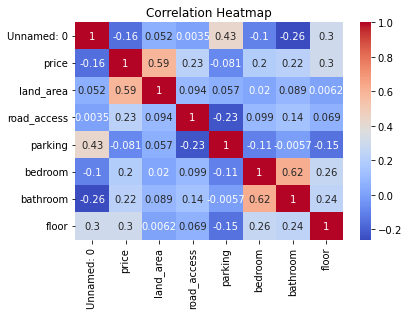

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df5.corr()

#  correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Display the correlation graph
plt.show()

In [129]:
df5.dropna(inplace=True)
df5.drop(columns=['parking'])

,Unnamed: 0,title,address,price,land_area,road_access,Facing,bedroom,bathroom,floor,district
0,0,House on sale at Bhaisepati near Big Mart.,"Talim Kendra Road,Bhaisepati",85000000,2695.21,33.0,South/East,6.0,5.0,2.5,Kathmandu
1,1,Residential Semi-Furnished 6 BHK Bungalow Hous...,"Balkumari, Imadole,Balkumari",60000000,3080.25,13.0,East,6.0,6.0,3.5,Lalitpur
2,2,Residential 3.5 Storey House is FOR SALE at Op...,"Banasthali,Dhungedhara",34000000,1369.00,13.0,East,6.0,5.0,3.5,Kathmandu
3,3,Luxury Villa For Sale @ Thecho just nearby CG ...,"Thecho,Sunakothi",85000000,3336.93,16.0,East,6.0,7.0,2.5,Lalitpur
5,5,Beautifull 2.5 storied Residential House for S...,"Bhaisipati, Saibudol,Bhaisepati",33500000,1796.81,14.0,North/East,5.0,4.0,2.5,Lalitpur
7,7,"Semi-furnished Residential Bungalow House ""𝐅𝐎𝐑...","Kritipur,Tyanglaphat Heigh",57000000,2566.87,20.0,east,5.0,4.0,2.0,Kathmandu
8,8,"Residential Bungalow House ""𝐅𝐎𝐑 𝐒𝐀𝐋𝐄"" at Mahar...","Maharajgunj,chakrapath",72500000,3422.50,13.0,North/East,6.0,4.0,2.5,Kathmandu
9,9,Residential 2.5 Storey Ready to MOVE Full-furn...,"Ichangu Narayan, Namgel chowk,sano bharyang",31000000,1304.82,10.0,north,5.0,4.0,2.5,Kathmandu
10,10,The living or corporate business is easy in th...,"Madikhatar Tennis Court,Budhanilantha",43500000,2224.62,13.0,North/West,4.0,5.0,3.5,Kathmandu
11,11,"7 BHK Semi-Commercial flat system's House is ""...","Shankhamul,Sankhamul, Near by Bagmati Bridge",68000000,2566.87,20.0,east and north,7.0,3.0,3.5,Kathmandu


In [130]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

# Separate the features (X) and target variable (y)
df5.drop('title', axis=1)
X = df5.drop(columns=['price'])
y = df5['price']


# Perform one-hot encoding for nominal categorical variables
nominal_cols = ['Facing', 'address', 'district','title']
transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(drop='first'), nominal_cols)],
                                remainder='passthrough')
X_encoded = transformer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)


# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("R-mean-squared:", rmse)



Mean Squared Error: 881894186330065.9
R-squared: -1.5910629519628214
R-mean-squared: 29696703.29060224


In [6]:
#extracting city from address
import pandas as pd
df5=pd.read_csv('bhoomi7.csv')
city=[]

for address in (df5['address']):
    

    parts = str(address).split(",")
    
    cit=parts[0].strip()
    
    
    city.append(cit)

df5['address']=city
df5.to_csv('bhoomi7.csv',index=False)

In [15]:
#removing all null values


<bound method DataFrame.dropna of     Unnamed: 0                                              title  \
0            0         House on sale at Bhaisepati near Big Mart.   
1            1  Residential Semi-Furnished 6 BHK Bungalow Hous...   
2            2  Residential 3.5 Storey House is FOR SALE at Op...   
3            3  Luxury Villa For Sale @ Thecho just nearby CG ...   
4            4              Bungalo on sale at Sunakothi Lalitpur   
5            5  Beautifull 2.5 storied Residential House for S...   
6            6  Residential 3.5 storey house built on 6 aana 3...   
7            7  Semi-furnished Residential Bungalow House "𝐅𝐎𝐑...   
8            8  Residential Bungalow House "𝐅𝐎𝐑 𝐒𝐀𝐋𝐄" at Mahar...   
9            9  Residential 2.5 Storey Ready to MOVE Full-furn...   
10          10  The living or corporate business is easy in th...   
11          11  7 BHK Semi-Commercial flat system's House is "...   
12          12  Beautiful 2.5 storied Residential “HOUSE FOR S...   


In [17]:
df6=pd.read_csv('bhoomi7.csv')
del df6['parking']

In [18]:
#removing all null values
df6=df6.dropna()

In [21]:
del df6['Unnamed: 0']

In [24]:
df6.to_csv("datset_mb.csv",index=False)

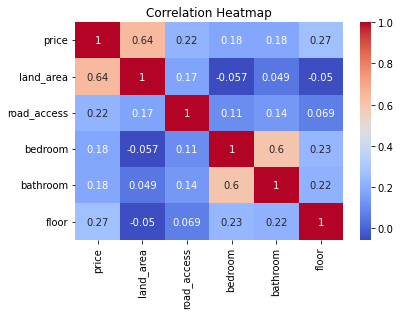

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df6.corr()

#  correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Display the correlation graph
plt.show()